In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline

In [126]:
df1= pd.read_csv("/content/Train1.csv")
print(df1)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [127]:
df1.sample(5)# print random sample 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8138,FDV01,19.20,Regular,0.085123,Canned,155.4314,OUT045,2002,NaN,Tier 2,Supermarket Type1,3568.0222
3057,FDX25,16.70,Low Fat,0.102036,Canned,180.9292,OUT035,2004,Small,Tier 2,Supermarket Type1,2736.4380
999,NCP06,NaN,Low Fat,0.039056,Household,152.3366,OUT027,1985,Medium,Tier 3,Supermarket Type3,2115.9124
3210,FDH34,8.63,Low Fat,0.031144,Snack Foods,183.9582,OUT049,1999,Medium,Tier 1,Supermarket Type1,5386.9878
2281,FDH34,8.63,Low Fat,0.031271,Snack Foods,186.0582,OUT017,2007,NaN,Tier 2,Supermarket Type1,3900.9222


In [128]:
df1.shape # no of rows and columns

(8523, 12)

In [129]:
df1.ndim # there are 2 dimensions attributes and instances.

2

In [130]:
df1.size#rows product columns

102276

In [131]:
df1.columns#to know columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [132]:
df1.info()# data description about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [133]:
#Here we are preprocessing data for 1000 rows
df1=df1.head(1000)# print 1000 rows
print(df1)

    Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0             FDA15        9.300          Low Fat         0.016047   
1             DRC01        5.920          Regular         0.019278   
2             FDN15       17.500          Low Fat         0.016760   
3             FDX07       19.200          Regular         0.000000   
4             NCD19        8.930          Low Fat         0.000000   
..              ...          ...              ...              ...   
995           FDO34       17.700          Low Fat         0.050112   
996           NCL30       18.100          Low Fat         0.048931   
997           FDK28        5.695          Low Fat         0.065961   
998           DRJ39       20.250          Low Fat         0.036319   
999           NCP06          NaN          Low Fat         0.039056   

                 Item_Type  Item_MRP Outlet_Identifier  \
0                    Dairy  249.8092            OUT049   
1              Soft Drinks   48.2692       

In [134]:
#here we are finding the item weight mean
df1['Item_Weight'].mean()

13.032137592137593

In [135]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace=True)

In [136]:
df1.isnull().sum()# here we are finding the total null values

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  284
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [137]:
df1.describe()# statistical summary report

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,13.032138,0.066694,138.100303,1997.389000,2190.633137
std,4.261831,0.052238,62.152665,8.417989,1758.717873
min,4.610000,0.000000,31.290000,1985.000000,33.290000
25%,9.395000,0.026658,90.055400,1987.000000,807.116050
50%,13.032138,0.054691,140.099600,1999.000000,1757.712000
75%,16.350000,0.095443,182.662750,2004.000000,3087.314600
max,21.350000,0.328391,265.222600,2009.000000,9275.925600


In [138]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


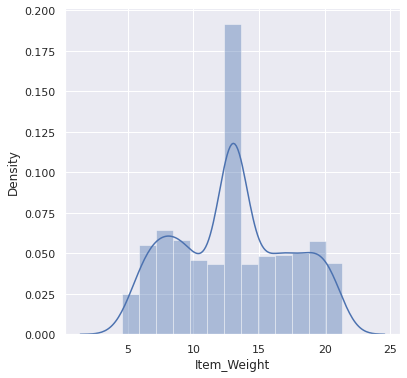

In [139]:
#
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


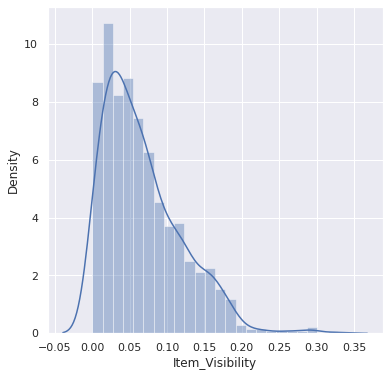

In [140]:
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_Visibility'])
plt.show()

In [141]:
df1.head() # starting 5 rows will be print

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
#count of item fat content
df1['Item_Fat_Content'].value_counts()

Low Fat    622
Regular    328
LF          26
low fat     13
reg         11
Name: Item_Fat_Content, dtype: int64

In [143]:
# here we are replacing the lowfat into LowFat ,LF converted to Low FAt and reg into Regular.
df1.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [144]:
#Total fat conetnt count
df1['Item_Fat_Content'].value_counts()

Low Fat    661
Regular    339
Name: Item_Fat_Content, dtype: int64

In [145]:
df1.count()#  total count of each and every column

Item_Identifier              1000
Item_Weight                  1000
Item_Fat_Content             1000
Item_Visibility              1000
Item_Type                    1000
Item_MRP                     1000
Outlet_Identifier            1000
Outlet_Establishment_Year    1000
Outlet_Size                   716
Outlet_Location_Type         1000
Outlet_Type                  1000
Item_Outlet_Sales            1000
dtype: int64

In [146]:
df1.duplicated()# identify duplicate values if duplicate values are there then it will return true

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [147]:
df1.corr()# variable is related to another variable

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017213,0.047787,-0.009247,0.011355
Item_Visibility,-0.017213,1.000000,0.012226,-0.114948,-0.093142
Item_MRP,0.047787,0.012226,1.000000,0.055565,0.581664
Outlet_Establishment_Year,-0.009247,-0.114948,0.055565,1.000000,-0.024841
Item_Outlet_Sales,0.011355,-0.093142,0.581664,-0.024841,1.000000


In [148]:
df1.loc[:6:]# up to 6 rows all columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


In [149]:
# Here we are finding the total null values
df1.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [150]:
df1.isnull().sum() # we are checking the percentage of missing values in our data.

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  284
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [151]:
df1.isna().all()#from all values having null values or not

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [152]:
print(df1.shape)#drop the columns which having null values
ds=df1.dropna(axis=1)
ds.shape               

(1000, 12)


(1000, 11)

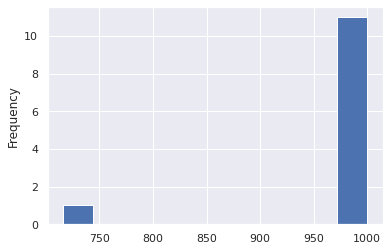

In [153]:
df1.count().plot.hist()

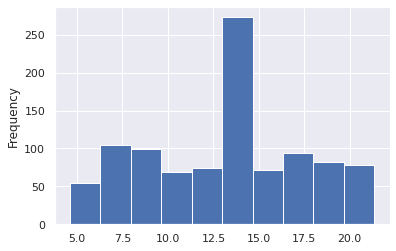

In [154]:
df1.Item_Weight.plot.hist()#here we are using histogram for knowing the item weights

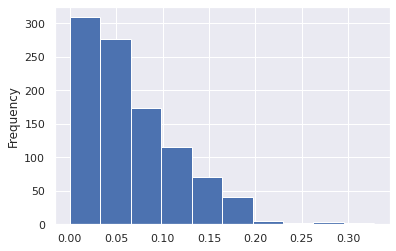

In [155]:
#here we plotting histogram for item visibilty that means the product is available percentage in particular stores
df1.Item_Visibility.plot.hist()

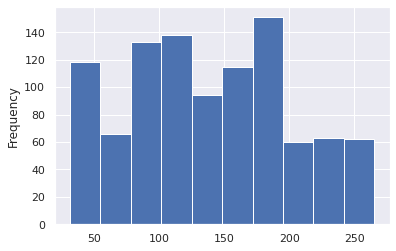

In [156]:
#here we are able to see the market retail prices of the items and by observing that we are able to know is that item cost is low or high. 
df1.Item_MRP.plot.hist()

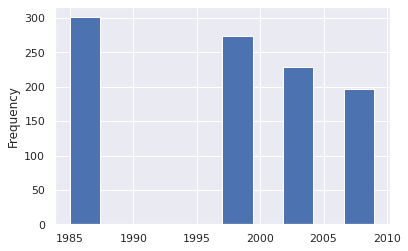

In [157]:
#here we are able to know about the store establishment year.
df1.Outlet_Establishment_Year.plot.hist()

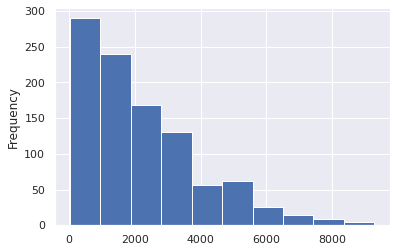

In [158]:
#Here we are able to know the sales of product and this is our target variable.
df1.Item_Outlet_Sales.plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item_Outlet_Sales\xa0Distribution')

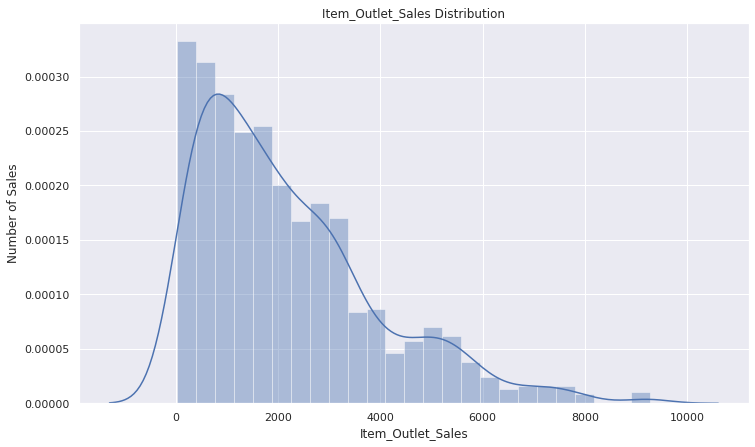

In [159]:
#we can see that our target variable is skewed towards the right,therefore we have to normalize it.
plt.figure(figsize=(12,7))
sns.distplot(df1.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


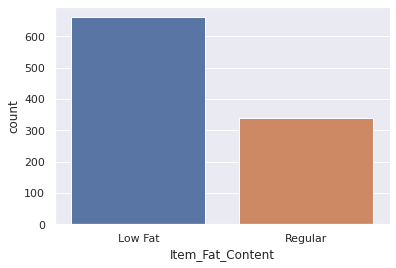

In [160]:
#There are two possible type "low fat" or "regular" 
sns.countplot(df1.Item_Fat_Content)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


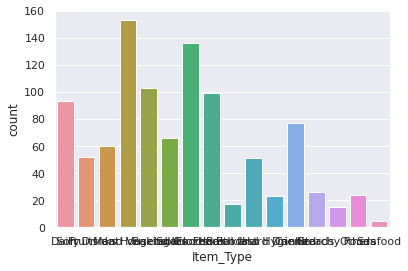

In [161]:
#we have 16 different types of unique values and it is high number for categorical variable.therefore we must reduce it.
sns.countplot(df1.Item_Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


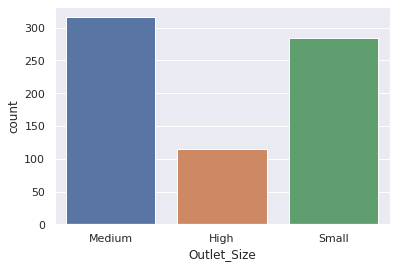

In [162]:
#There seems to be less number of stores with size equals to "high".it will be very intresting to see how this variable relates to our target.
sns.countplot(df1.Outlet_Size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


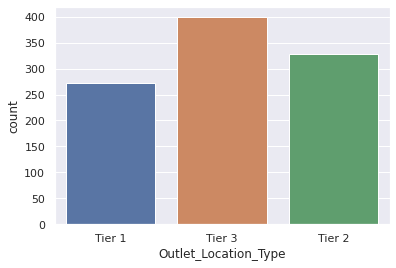

In [163]:
#from above graph we can see that bigmart is a brand of medium and small size city compare to densly populated area
sns.countplot(df1.Outlet_Location_Type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


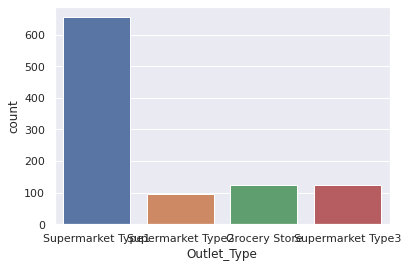

In [164]:
#there seems like supermart type2 grocery store and supermarket type3 all have low numbers of stores,we can create a single category with all of three but before doing this we must see their impact on target variable
sns.countplot(df1.Outlet_Type)

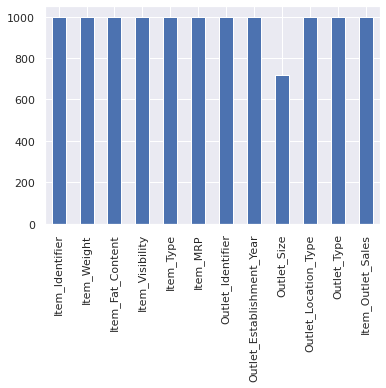

In [165]:
df1.count().plot.bar()# bar chart for total data set

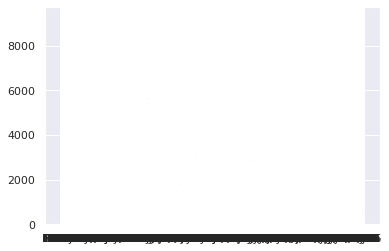

In [166]:
#here we are able to know the relation between target variable and item identifier  
import matplotlib.pyplot as plt
plt.bar(df1.Item_Identifier,df1.Item_Outlet_Sales)
plt.show()

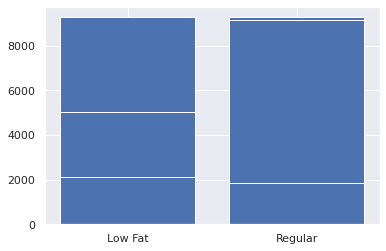

In [167]:
#Low fat products seem to be higher sales than the regular products
plt.bar(df1.Item_Fat_Content,df1.Item_Outlet_Sales)
plt.show()

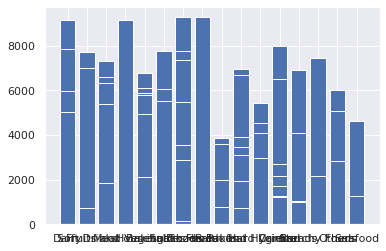

In [168]:
plt.bar(df1.Item_Type,df1.Item_Outlet_Sales)
plt.show()

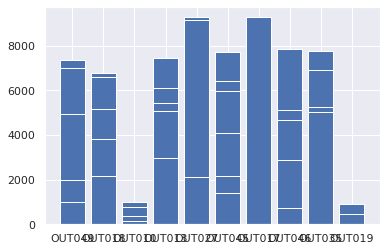

In [169]:
#out of 10- two groceries stores 6 supermarket type1, one supermarket Type2 and 1 supermarket type3.
plt.bar(df1.Outlet_Identifier,df1.Item_Outlet_Sales)
plt.show()

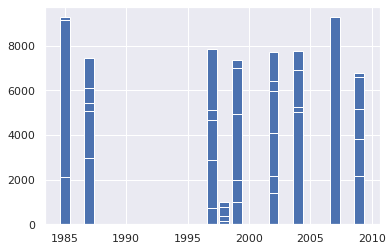

In [170]:
#There seems to be no appreciable meaning between year of store establishment and sales for the items
plt.bar(df1.Outlet_Establishment_Year,df1.Item_Outlet_Sales)
plt.show()

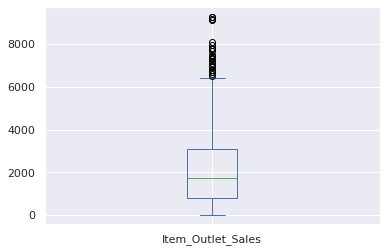

In [171]:
df1.Item_Outlet_Sales.plot.box()

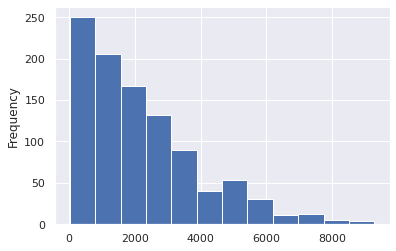

In [172]:
df1.Item_Outlet_Sales.plot.hist(bins=12)

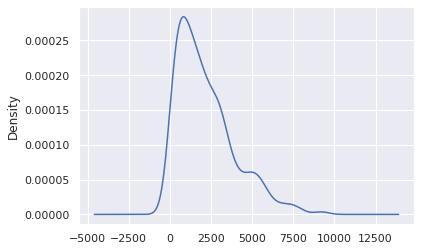

In [173]:
df1.Item_Outlet_Sales.plot.kde()#kernal density estimation

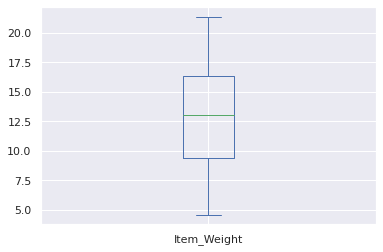

In [174]:
df1.Item_Weight.plot.box()

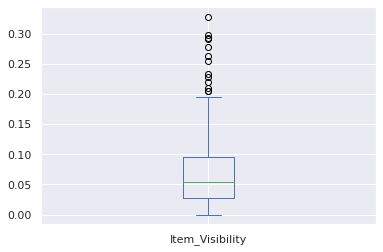

In [175]:
df1.Item_Visibility.plot.box()

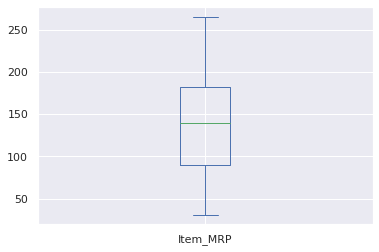

In [176]:
df1.Item_MRP.plot.box()

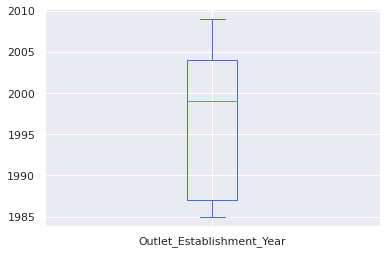

In [177]:
df1.Outlet_Establishment_Year.plot.box()

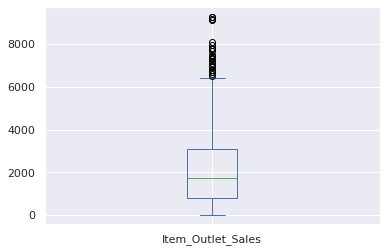

In [178]:
df1.Item_Outlet_Sales.plot.box()

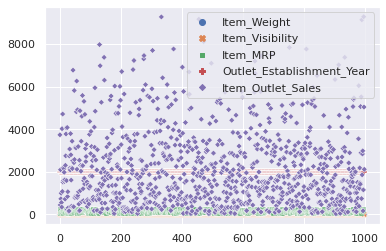

In [179]:
import seaborn as sns
sns.scatterplot(data=df1)

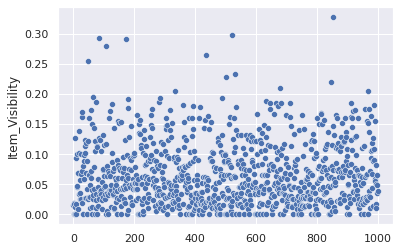

In [180]:
sns.scatterplot(data=df1.Item_Visibility)

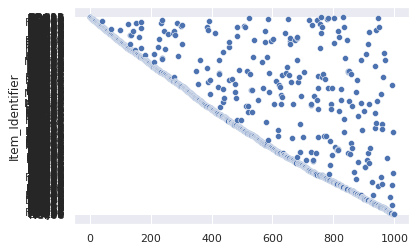

In [181]:
sns.scatterplot(data=df1.Item_Identifier)

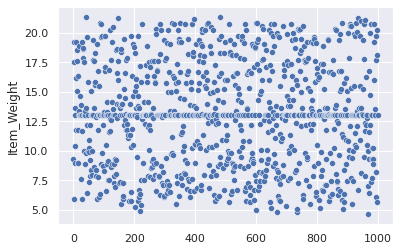

In [182]:
sns.scatterplot(data=df1.Item_Weight)

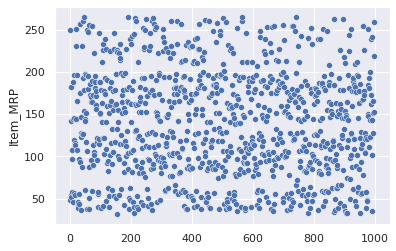

In [183]:
sns.scatterplot(data=df1.Item_MRP)

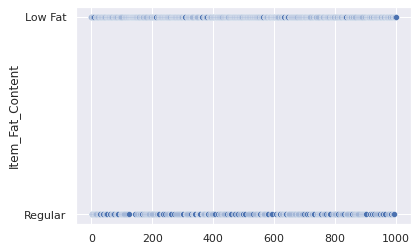

In [184]:
sns.scatterplot(data=df1.Item_Fat_Content)

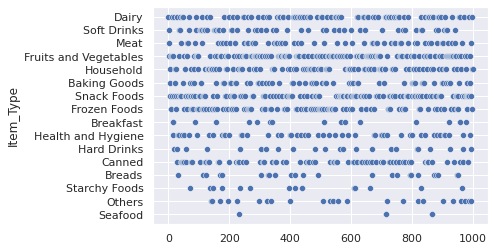

In [185]:
sns.scatterplot(data=df1.Item_Type)

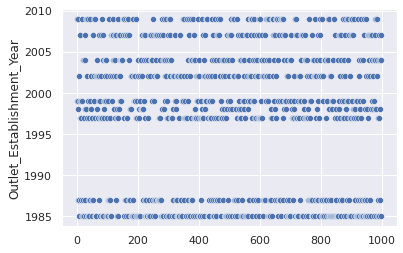

In [186]:
sns.scatterplot(data=df1.Outlet_Establishment_Year)

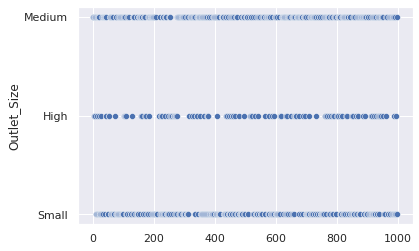

In [187]:
sns.scatterplot(data=df1.Outlet_Size)

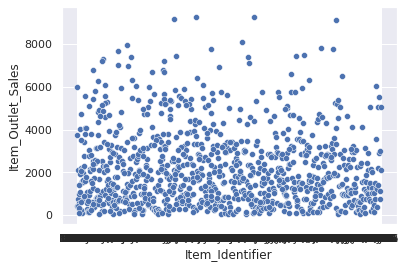

In [188]:
#here we are able to know the relation between identifier and outlet sales.
sns.scatterplot(x='Item_Identifier',y='Item_Outlet_Sales',data=df1,palette='blues')

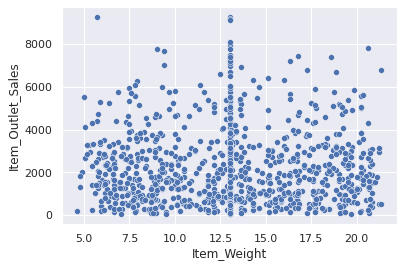

In [189]:
#Item weight and have a low correlation with our target variable.
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df1)

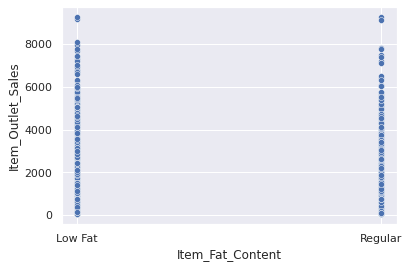

In [190]:
#it shows that there is a relation between sales and fat content.
sns.scatterplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df1)

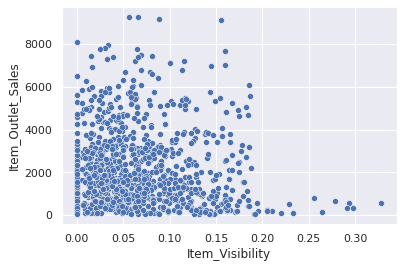

In [191]:
#it shows that visibility of product in stores and that is for sales if the visibility of item is more then the product sales will be good.
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df1)

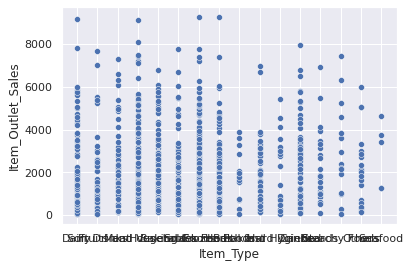

In [192]:
sns.scatterplot(x='Item_Type',y='Item_Outlet_Sales',data=df1)

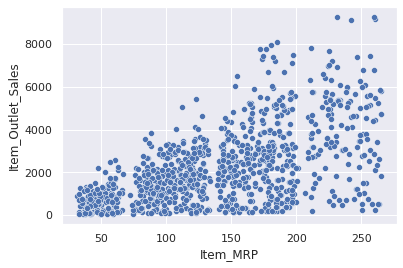

In [193]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df1)

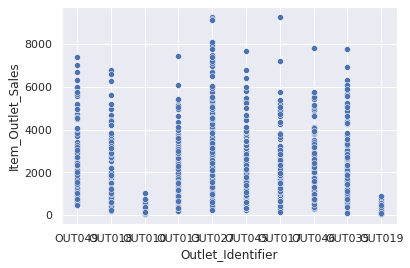

In [194]:
sns.scatterplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df1)

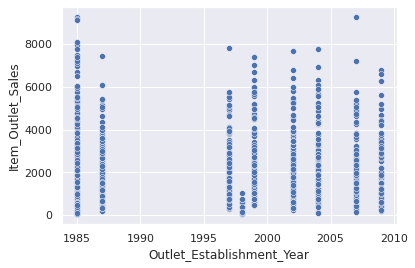

In [195]:

sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df1)

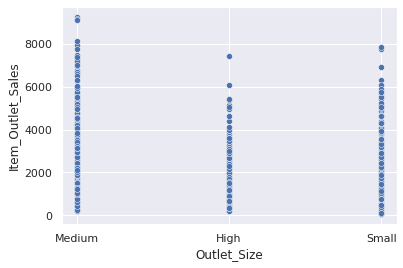

In [196]:
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1)

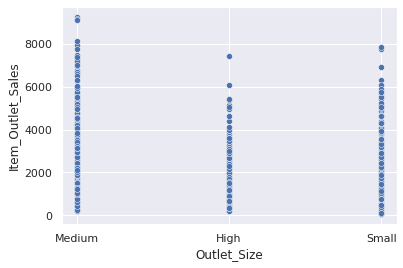

In [197]:
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1)

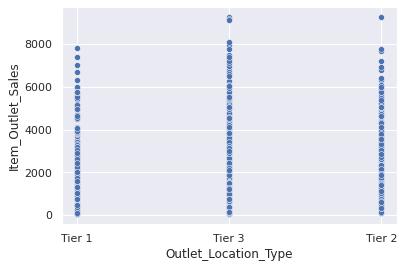

In [198]:
sns.scatterplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df1)

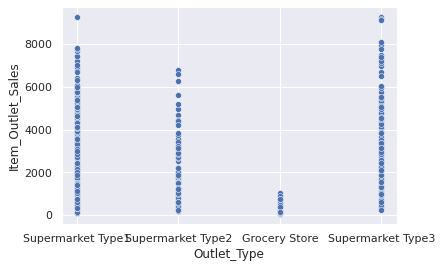

In [199]:
sns.scatterplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df1)

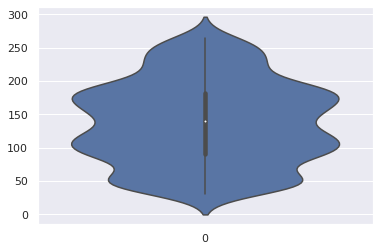

In [200]:
sns.violinplot(data=df1.Item_MRP)

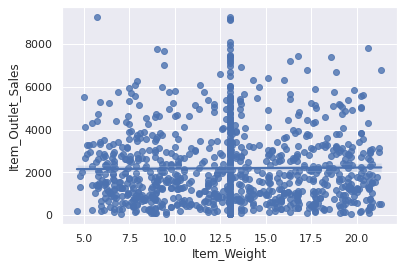

In [201]:
sns.regplot(x=df1.Item_Weight,y=df1.Item_Outlet_Sales)

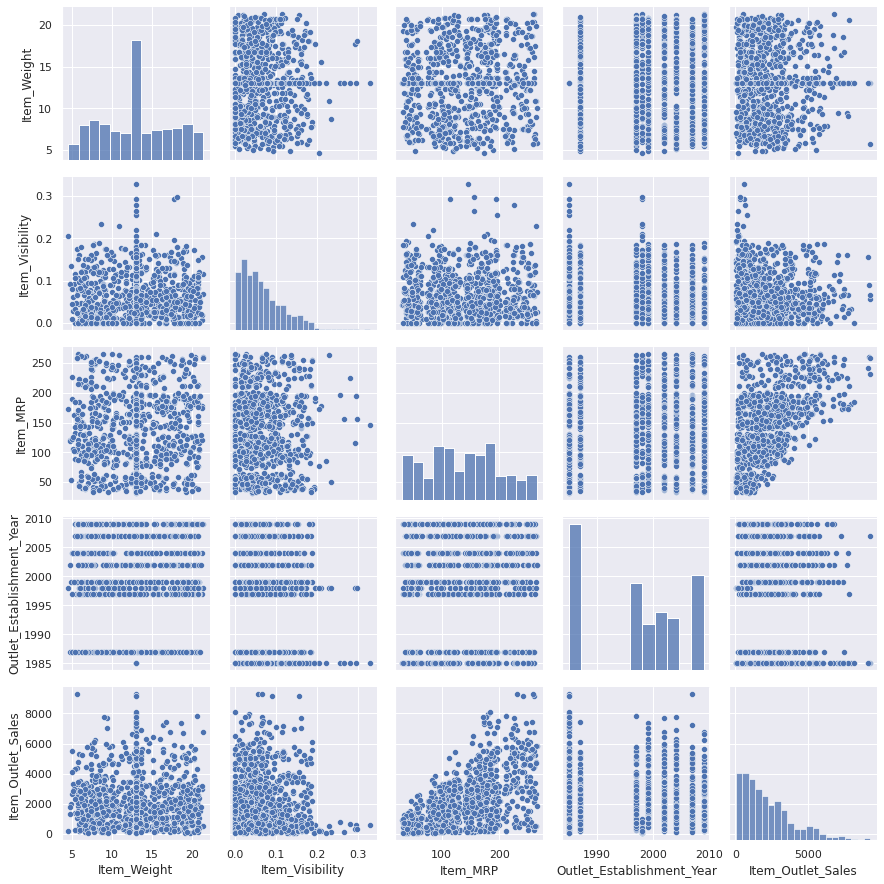

In [202]:
sns.pairplot(df1)

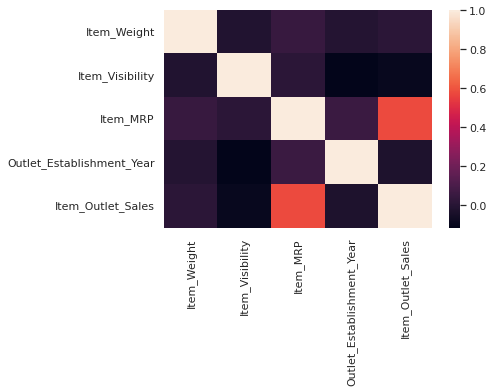

In [203]:
sns.heatmap(df1.corr())

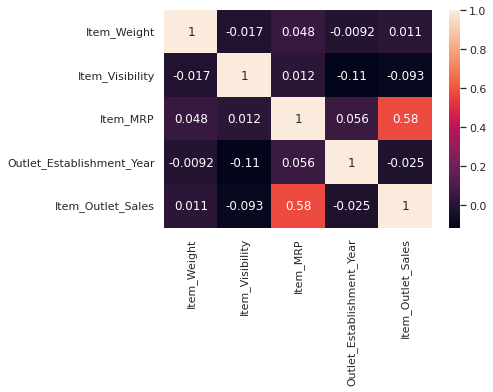

In [204]:
sns.heatmap(df1.corr(),annot=True)

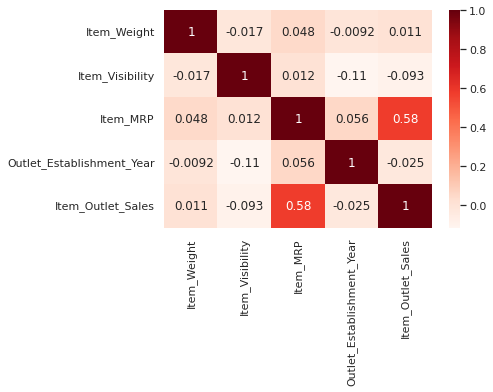

In [205]:
sns.heatmap(df1.corr(),annot=True,cmap='Reds')

In [206]:
df1.drop(['Item_Fat_Content'],axis=1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
995,FDO34,17.700000,0.050112,Snack Foods,165.9816,OUT010,1998,NaN,Tier 3,Grocery Store,167.7816
996,NCL30,18.100000,0.048931,Household,127.3336,OUT035,2004,Small,Tier 2,Supermarket Type1,1150.5024
997,FDK28,5.695000,0.065961,Frozen Foods,259.2646,OUT017,2007,NaN,Tier 2,Supermarket Type1,9275.9256
998,DRJ39,20.250000,0.036319,Dairy,219.3482,OUT035,2004,Small,Tier 2,Supermarket Type1,5038.1086


In [207]:
#data cleaning
df1.apply(lambda x: sum(x.isnull()))

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  284
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [208]:
df1.Item_Outlet_Sales = df1.Item_Outlet_Sales.fillna(df1.Item_Outlet_Sales.mean())

In [209]:
df1['Outlet_Size'].value_counts()

Medium    316
Small     285
High      115
Name: Outlet_Size, dtype: int64

In [210]:
df1.Outlet_Size = df1.Outlet_Size.fillna('Medium')

In [211]:
df1.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Label Encoding


In [212]:
from sklearn.preprocessing import LabelEncoder

In [213]:
encoder = LabelEncoder()

In [214]:
df1['Item_Identifier']=encoder.fit_transform(df1['Item_Identifier'])

df1['Item_Fat_Content']=encoder.fit_transform(df1['Item_Fat_Content'])

df1['Item_Type']=encoder.fit_transform(df1['Item_Type'])

df1['Outlet_Identifier']=encoder.fit_transform(df1['Outlet_Identifier'])

df1['Outlet_Size']=encoder.fit_transform(df1['Outlet_Size'].astype(str))

df1['Outlet_Location_Type']=encoder.fit_transform(df1['Outlet_Location_Type'])

df1['Outlet_Type']=encoder.fit_transform(df1['Outlet_Type'])

In [215]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,84,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,3,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,325,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,543,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,638,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [216]:
X=df1.drop(columns='Item_Outlet_Sales',axis=1)
Y=df1['Item_Outlet_Sales']

In [217]:
print(X)

     Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 84     9.300000                 0         0.016047   
1                  3     5.920000                 1         0.019278   
2                325    17.500000                 0         0.016760   
3                543    19.200000                 1         0.000000   
4                638     8.930000                 0         0.000000   
..               ...          ...               ...              ...   
995              354    17.700000                 0         0.050112   
996              677    18.100000                 0         0.048931   
997              271     5.695000                 0         0.065961   
998               49    20.250000                 0         0.036319   
999              705    13.032138                 0         0.039056   

     Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            4  249.8092                  9                  

In [218]:
print(Y)

0      3735.1380
1       443.4228
2      2097.2700
3       732.3800
4       994.7052
         ...    
995     167.7816
996    1150.5024
997    9275.9256
998    5038.1086
999    2115.9124
Name: Item_Outlet_Sales, Length: 1000, dtype: float64


#Model Evaluation


In [219]:
X_train ,X_test ,y_train ,y_test =train_test_split(X,Y, test_size =0.2 ,random_state=2)

In [220]:
print(X.shape,X_train.shape,X_test.shape)

(1000, 11) (800, 11) (200, 11)


In [221]:
regressor= XGBRegressor( )

In [222]:
regressor.fit(X_train, y_train)

[15:07:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [223]:
training_data_prediction =regressor.predict(X_train)

In [224]:
r2_train =metrics.r2_score(y_train,training_data_prediction)

In [225]:
print('R Squared value=' ,r2_train)

R Squared value= 0.7646926501420891


In [226]:
test_data_prediction =regressor.predict(X_test)

In [227]:
r2_test =metrics.r2_score(y_test,test_data_prediction)

In [228]:
print('R Squared value=' ,r2_test)

R Squared value= 0.6282989950899187


In [229]:
from sklearn.ensemble import RandomForestRegressor

In [230]:
rfr = RandomForestRegressor(random_state=4)

In [231]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=4)

In [232]:
y_pred = rfr.predict(X_test)

In [233]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [234]:
y_pred

array([1957.099126, 4174.53271 , 1022.728722, 1184.59136 ,  741.994152,
       3381.072218, 4472.384998,  330.962522,  892.451636, 1715.886444,
       1054.800308, 1399.098804, 1508.776038,  740.13657 , 2101.451224,
       4980.823168, 2308.16215 , 1315.334506, 2774.541734, 1028.747554,
       1570.32259 , 2976.651982, 5169.73726 , 2172.791694, 5229.39294 ,
       4257.884212, 2465.896828, 2679.698524, 2977.204596, 1797.553472,
        948.079226, 2115.199994,  157.06222 ,  873.216674, 2188.977292,
       4118.512298, 4239.308392, 2308.088912,  833.588258, 5211.323128,
        273.71038 , 4951.741024, 2155.174626, 2733.80809 , 3491.774784,
       1994.86996 , 1972.39921 ,  875.247364,  970.70311 ,  441.518612,
        847.203868, 2488.620582, 3841.812476, 1410.736988,  556.40906 ,
       3222.20568 , 1866.556984, 5880.598604, 3241.24756 , 1481.584766,
        249.794844, 2735.033162, 5580.023194, 3646.167146, 1369.310912,
       3088.865914,  831.897126, 3576.517808, 2370.860536, 1121.

In [235]:
a=mean_squared_error(y_test,y_pred)

In [236]:
a

1168307.1217097656

In [237]:
b=mean_absolute_error(y_test,y_pred)

In [238]:
b

778.91029854

In [239]:
c=r2_score(y_test,y_pred)

In [240]:
c

0.6228633380148202

In [241]:
total=len(y_test)